# Text Classification: sentiment analysis.

### Data

The dataset we will use of this problem is known as the Stanford Sentiment Treebank. Movie reviews with one sentence per review:
* `sst.bin.*` with binary labels: negative or positive
* `sst.fine.*` with fine-grained labels (very negative, negative, neutral, positive, very positive),

In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt

/home/ashmat98/.miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open("data/sst.bin.train", "r") as f:
    train = [(int(x.split()[0]), x.split()[1:]) for x in f.readlines()]
with open("data/sst.bin.val", "r") as f:
    val = [(int(x.split()[0]), x.split()[1:]) for x in f.readlines()]
with open("data/sst.bin.test", "r") as f:
    test = [(x.split()[1:]) for x in f.readlines()]
print("Train:     ", len(train), "  Mean sentence length:", np.mean([len(x[1]) for x in train]).round(2))
print("Validation:", len(val))
print("Test:      ", len(test))

Train:      6920   Mean sentence length: 19.3
Validation: 872
Test:       1821


In [3]:
from collections import Counter, defaultdict
import itertools


In [4]:
# calculate word frequencies
word_frequencies = Counter(itertools.chain(
    *((word for word in sample[1]) for sample in train)
))

Vocabulary size: 14828


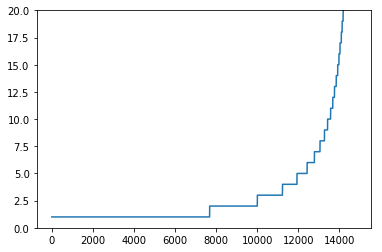

In [12]:
print("Vocabulary size:", len(word_frequencies))

plt.plot([x[1] for x in word_frequencies.most_common()[::-1]])
plt.ylim(0, 20);

In [13]:
# indexing words

PAD = 0 # padding
UNK = 1 # unknown word
vocab = dict()

word_index = 2
for w, c in word_frequencies.items():
    if c > 3:
        vocab[w] = word_index
        word_index += 1

len(vocab), word_index

(3592, 3594)

In [17]:
# change words with indices

train_X = [[vocab.get(x, UNK) for x in sample[1]]
                    for sample in train]
train_y = [sample[0] for sample in train]

max_len = np.sort([len(x) for x in train_X])

val_X = [[vocab.get(x, UNK) for x in sample[1]]
                    for sample in val]
val_y = [sample[0] for sample in val]


In [18]:
train_X = keras.preprocessing.sequence.pad_sequences(train_X, value=PAD)
train_y = np.array(train_y)

val_X = keras.preprocessing.sequence.pad_sequences(val_X, value=PAD)
val_y = np.array(val_y)



In [19]:
train_X.shape, train_y.shape, val_X.shape, val_y.shape

((6920, 52), (6920,), (872, 47), (872,))

In [20]:
from keras import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense

In [21]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(word_index, embedding_vecor_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          115008    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 168,309
Trainable params: 168,309
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=10, batch_size=64)

Train on 6920 samples, validate on 872 samples
Epoch 1/10
6920/6920 [==============================] - 9s 1ms/step - loss: 0.6823 - acc: 0.5873 - val_loss: 0.6569 - val_acc: 0.6239
Epoch 2/10
6920/6920 [==============================] - 6s 888us/step - loss: 0.6137 - acc: 0.6980 - val_loss: 0.5593 - val_acc: 0.7443
Epoch 3/10
6920/6920 [==============================] - 6s 905us/step - loss: 0.4506 - acc: 0.7997 - val_loss: 0.4819 - val_acc: 0.7695
Epoch 4/10
6920/6920 [==============================] - 6s 870us/step - loss: 0.3215 - acc: 0.8676 - val_loss: 0.5110 - val_acc: 0.7683
Epoch 5/10
6920/6920 [==============================] - 6s 875us/step - loss: 0.2551 - acc: 0.8974 - val_loss: 0.5461 - val_acc: 0.7615
Epoch 6/10
6920/6920 [==============================] - 6s 879us/step - loss: 0.2163 - acc: 0.9186 - val_loss: 0.6043 - val_acc: 0.7672
Epoch 7/10
6920/6920 [==============================] - 7s 1ms/step - loss: 0.1804 - acc: 0.9358 - val_loss: 0.6873 - val_acc: 0.7466
Epoch

<img src="img/rnn_converge.jpg" style="height: 400px;"/>

## Assignment

Now it is your turn to build the models.
I ask that you construct the following models:

1. A naive Bayes unigram classifer (follow Wang and Manning http://www.aclweb.org/anthology/P/P12/P12-2.pdf#page=118: you should only implement Naive Bayes, not the combined classifer with SVM).
2. A logistic regression model over word types (you can implement this as $y = \sigma(\sum_i W x_i + b)$) 
3. A continuous bag-of-word neural network with embeddings (similar to CBOW in Mikolov et al https://arxiv.org/pdf/1301.3781.pdf).
4. A simple convolutional neural network (any variant of CNN as described in Kim http://aclweb.org/anthology/D/D14/D14-1181.pdf).
5. Your own extensions to these models...

[this](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/) will be useful
<br>
You can also use pretrained word vectors (https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.vec)


Consult the papers provided for hyperparameters. 